In [1]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

D:\Anaconda\envs\lane_seg\lib\site-packages\tqdm-4.66.4-py3.8.egg\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 配置文件
config = 'weights/tiny.py'
checkpoint = 'weights/tiny.pth'

model = init_detector(config, checkpoint, 'cuda:0')


load checkpoint from local path: weights/tiny.pth


In [3]:
test_img = 'imgs/road.png'
result = inference_detector(model, test_img)

e:\my_project\ai_swim_transfoemer\2.环境配置\swin-transformer-object-detection\swin-transformer-object-detection\mmdet\datasets\utils.py:64: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
D:\Anaconda\envs\lane_seg\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [4]:
bbox_result, segm_result = result

In [5]:
import mmcv
import numpy as np

In [6]:
bboxes = np.vstack(bbox_result)
labels = [
    np.full(bbox.shape[0], i, dtype=np.int32)
    for i, bbox in enumerate(bbox_result)
]
labels = np.concatenate(labels)

In [7]:
segms = mmcv.concat_list(segm_result)
segms = np.stack(segms, axis=0)

In [8]:
# 读取并显示

In [9]:
import cv2

In [10]:
img = cv2.imread(test_img)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1079.5, 1439.5, -0.5)

(-0.5, 1079.5, 1439.5, -0.5)

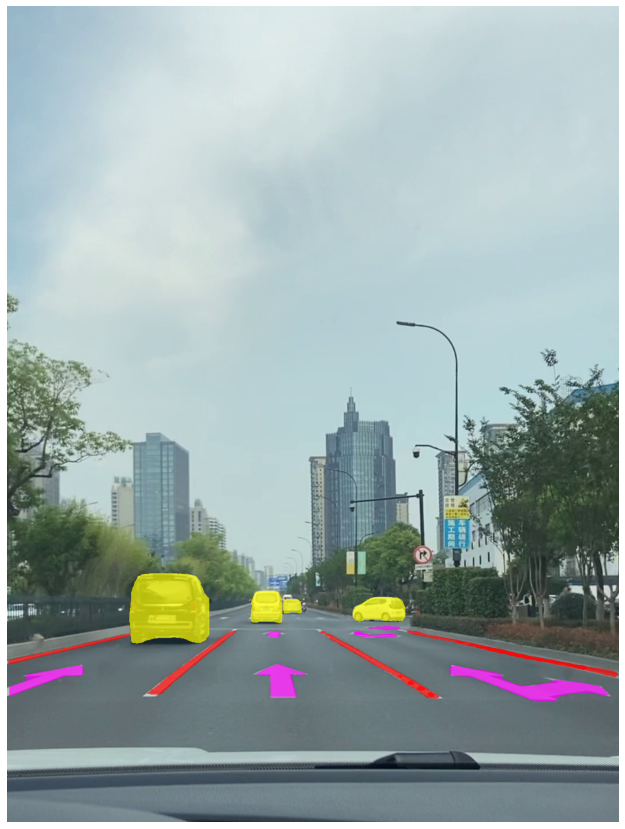

In [47]:
img_copy =  img.copy()
CLASSES = ('arrow', 'car', 'dashed', 'line')
colors  = [(255,0,255), (0,255,255), (0,255,0), (0,0,255)]
alpha_list = [0.3, 0.3, 0.3, 0.3]

# 遍历结果    
for i,box in enumerate(bboxes):
    # 置信度
    conf =  box[-1]
    if conf > 0.3:
        # 检测到的框
        l,t,r,b = box[:4].astype('int')
        # 对应mask
        seg = segms[i]
        # 若mask为true，则将img_copy中的像素置为半透明
        alpha = alpha_list[labels[i]]
        color = colors[labels[i]]
        # 将遮罩处变成黑色
        # img_copy[seg == True] = (0,0,0) # 颜色可以自己设置
        
        img_copy[seg > 0,0] = img_copy[seg > 0,0] * alpha + color[0] * (1-alpha)
        img_copy[seg > 0,1] = img_copy[seg > 0,1] * alpha + color[1] * (1-alpha)
        img_copy[seg > 0,2] = img_copy[seg > 0,2] * alpha + color[2] * (1-alpha)
      
        
        # 绘制检测框
        # cv2.rectangle(img_copy,(l,t),(r,b),(0,255,0),2)
        # 绘制类别
        # cv2.putText(img_copy,str(CLASSES[labels[i]]),(l,t-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2)

# 显示
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')